# Explore Audio Features

In [1]:
# http://spotipy.readthedocs.io/en/latest/#api-reference
# https://beta.developer.spotify.com/documentation/web-api/reference

In [1]:
import json
import pandas as pd
import numpy as np
from pprint import pprint
import os.path
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-deep')

In [2]:
# Create spotify wrapper object

from spotify_wrapper import SpotifyWrapper
sp = SpotifyWrapper(client_id = '9b23e599c83f45d9a93e6559d79b3f4a', 
                    client_secret = '710a69f7a7984a6c9c71c1682c46d7b5')

## Testing functions

In [2]:
artist = sp.search_artist('ARCAdé fiRë')
(artist['name'], artist['popularity'], artist['followers']['total'], len(artist['genres']))

('Arcade Fire', 73, 1207300, 10)

In [3]:
albums = sp.get_albums_of_artist(artist['id'])
album_ids = [album['id'] for album in albums]
[(album['name'], album['id']) for album in albums]

[('Everything Now', '1DNojVW079FU9YnAMk3Cgr'),
 ('Reflektor (Deluxe)', '6kDCHWavDS2bNbtojhRjfJ'),
 ('Reflektor', '3Y2bjF2Jwocc0USbu08Y2I'),
 ('The Suburbs', '20fJJzq5ImlT929uORjN0h'),
 ('The Suburbs (Deluxe Edition)', '7fhy8EF51PpdmXfW03ZC6h'),
 ('Neon Bible', '7rncXz7PjaXTxyUfIcLaMT'),
 ('Funeral', '0Lu28wC62eXM4kr8DfUIKc')]

In [5]:
tracks = sp.get_tracks_of_album(album_ids[0])
track_ids = [track['id'] for track in tracks]
[(track['track_number'], track['name'], track['id']) for track in tracks]

[(1, 'Everything_Now (continued)', '2wXYAGCj2gA6biHi0W4xdJ'),
 (2, 'Everything Now', '7KsZHCfOitA5V9oQYVdltG'),
 (3, 'Signs of Life', '1g1RmSl6D0I6m6MEtDvxYn'),
 (4, 'Creature Comfort', '2voWPWlDfIthC6GUjaIQyV'),
 (5, 'Peter Pan', '0LOnyr7dtH8GQAVypvT98T'),
 (6, 'Chemistry', '7kIwVGX93RF6c8ZLKpeiNN'),
 (7, 'Infinite Content', '4bjPdsuv5zMINSxuaSm5QF'),
 (8, 'Infinite_Content', '3vxdRMOGm9bWFYTFOkhYpV'),
 (9, 'Electric Blue', '0KWcRXcnGoB0gWSu4mshF8'),
 (10, 'Good God Damn', '2ZssXuZfktUr4MMDzEWD2Z'),
 (11, 'Put Your Money on Me', '0SaEmR2rdtfsZawPjMYkWg'),
 (12, "We Don't Deserve Love", '0BP2o4rGe7nkQea1JOWMbl'),
 (13, 'Everything Now (continued)', '643ZDkyffqGWzkDTzSfMCM')]

In [6]:
tracks_features = sp.get_audio_features_of_tracks(track_ids)
tracks_features[0]

{'acousticness': 0.0167,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2wXYAGCj2gA6biHi0W4xdJ',
 'danceability': 0.331,
 'duration_ms': 46227,
 'energy': 0.493,
 'id': '2wXYAGCj2gA6biHi0W4xdJ',
 'instrumentalness': 0.00157,
 'key': 5,
 'liveness': 0.589,
 'loudness': -7.814,
 'mode': 1,
 'speechiness': 0.0394,
 'tempo': 74.341,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/2wXYAGCj2gA6biHi0W4xdJ',
 'type': 'audio_features',
 'uri': 'spotify:track:2wXYAGCj2gA6biHi0W4xdJ',
 'valence': 0.19}

## Get audio features of all tracks of all albums of an artist

In [3]:
# read from file if already downloaded
tracks_full_info = []
artists_read = []
if os.path.isfile('tracks_full_info.json'):
    json_data=open('tracks_full_info.json').read()
    tracks_full_info = json.loads(json_data)
    artists_read = set([sp.remove_accents(a['artist_name'].lower()) for a in tracks_full_info])
    print("{} artists read - {} tracks read".format(len(artists_read),len(tracks_full_info)))
    # pprint([a for a in artists_read])

36 artists read - 6828 tracks read


In [5]:
artists_to_search = ['Joy Division']

In [6]:
# get audio features of all tracks of all albums of all artists
for ats in artists_to_search:
    
    # if the artist is already in the tracks info, skip it
    if(sp.remove_accents(ats.lower()) in artists_read):
        continue
    
    # get artist
    artist = sp.search_artist(ats)
    print(artist['name'])
    
    # get albums
    albums = sp.get_albums_of_artist(artist['id'])
    
    # get tracks and audio features of tracks
    for album in albums:

        print('  ',album['name'])
        
        # get tracks info
        tracks = sp.get_tracks_of_album(album['id'])
        track_ids = [track['id'] for track in tracks]
                
        # get tracks audio features
        tracks_features = sp.get_audio_features_of_tracks(track_ids)
        
        # compile track, album and artist information
        for track in tracks_features:
            
            # look for corresponding track    
            track_info = next((t for t in tracks if t['id'] == track['id']), None)

            #print('    ',track_info['name'])
            
            # add track info to json with features
            track['duration_ms']  = track_info['duration_ms'];
            track['explicit']     = track_info['explicit'];
            track['name']         = track_info['name'];
            track['track_number'] = track_info['track_number'];

            # add album info to json with features
            track['album_id']           = album['id'];
            track['album_name']         = album['name'];
            track['album_release_date'] = album['release_date'];

            # add album info to json with features
            track['artist_id']         = artist['id'];
            track['artist_name']       = artist['name'];
            track['artist_followers']  = artist['followers']['total'];
            track['artist_popularity'] = artist['popularity'];

            tracks_full_info.append(track)

In [7]:
# persist tracks downloaded
with open('tracks_full_info.json', 'w') as fp:
    json.dump(tracks_full_info, fp)

In [4]:
# Create pandas dataframe
tracks = pd.DataFrame.from_dict(tracks_full_info).drop(['analysis_url', 'album_id', 'artist_id', 'track_href', 'uri', 'type', 'id'], 1)

In [5]:
# reorder columns
tracks = tracks[['artist_name', 'artist_popularity','artist_followers',\
        'album_name', 'album_release_date',\
        'name','track_number',\
        'explicit','duration_ms','acousticness', 'danceability', 'energy', 'instrumentalness', 'key', \
        'liveness','loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]

In [40]:
# Create RadioIver artist (Radiohead + Bon Iver)
#tracks['artist_name'] = tracks['artist_name'].apply(lambda x: 'RadioIver' if x in ['Radiohead', 'Bon Iver'] else x)

## Exploratory analysis: compare two artists plotting histograms of each feature

/home/eduard/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


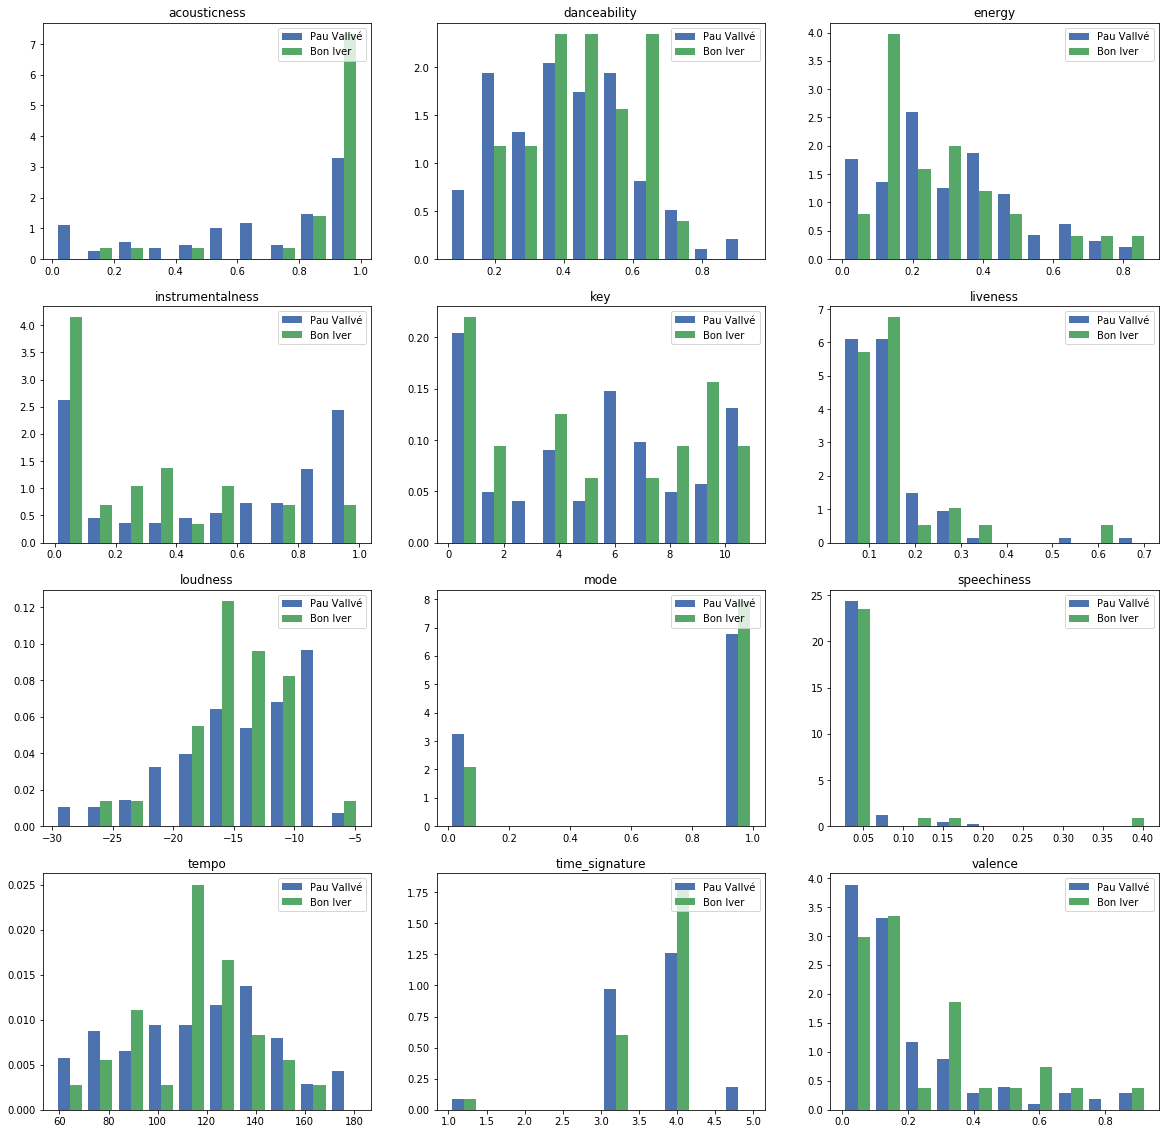

In [16]:
artists_to_compare = ['Pau Vallvé','Bon Iver']

features = ['acousticness','danceability','energy','instrumentalness','key','liveness',\
            'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

tracks_A = tracks[tracks['artist_name'] == artists_to_compare[0]]
tracks_B = tracks[tracks['artist_name'] == artists_to_compare[1]]

# plot with matplotlib
f, ax = plt.subplots(4,3)
f.set_figheight(20)
f.set_figwidth(20)
i=0; j=0; # init at top-left subplot
for f in features:
    ax[i,j].hist([tracks_A[f], tracks_B[f]], bins=10, density=True, label=[artists_to_compare[0], artists_to_compare[1]])
    ax[i,j].set_title(f)
    ax[i,j].legend(loc='upper right')
    j=j+1; # next col subplot
    if(j==3):
        # if last col subplot
        j=0; # first col subplot
        i=i+1; # next row subplot

## Using Kernel Density Estimation instead of raw histograms

https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28

https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

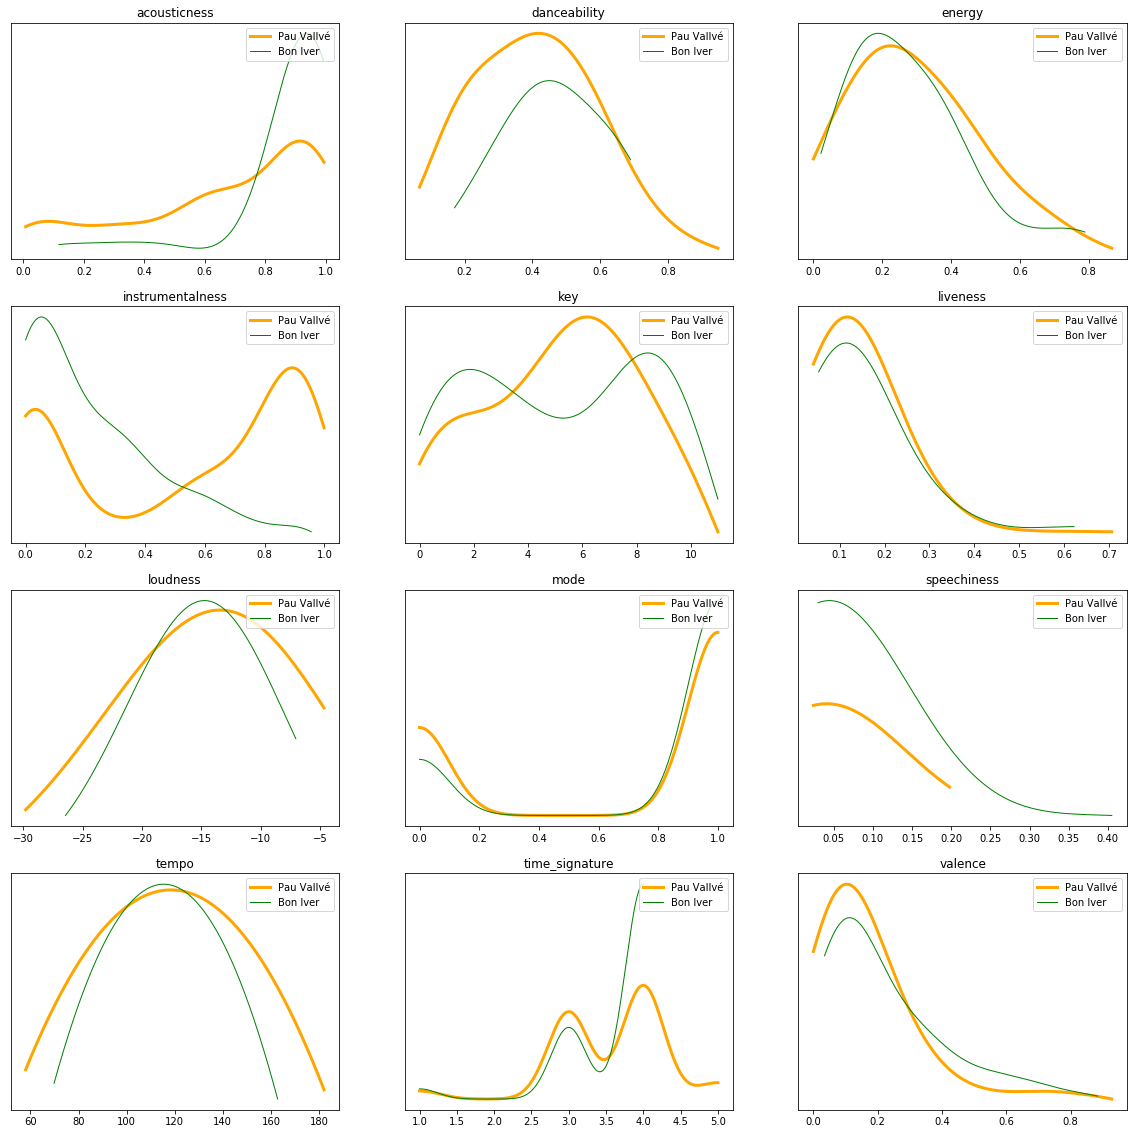

In [22]:
from sklearn.neighbors.kde import KernelDensity

artists_to_compare = [\
    {'name': 'Pau Vallvé', 'color' : 'orange', 'linewidth' : 3, 'linestyle' : '-'},
    #{'name': 'Radiohead', 'color' : 'blue', 'linewidth' : 1, 'linestyle' : '-'},
    {'name': 'Bon Iver', 'color' : 'green', 'linewidth' : 1, 'linestyle' : '-'},
    #{'name': 'Shakira', 'color' : 'red', 'linewidth' : 1, 'linestyle' : '--'}                      
]

features = ['acousticness','danceability','energy','instrumentalness','key','liveness',\
            'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence'];

# plot with matplotlib
fig, ax = plt.subplots(4,3)
fig.set_figheight(20)
fig.set_figwidth(20)
i=0; j=0; # init at top-left subplot

for f in features:
        
    for a in artists_to_compare:
                
        # filter tracks by artist
        t_a = tracks[tracks['artist_name'] == a['name']]

        # create arrays with data
        x = np.array(t_a[f])[:,np.newaxis];
        x_plot = np.linspace(x.min(), x.max(), 1000)[:, np.newaxis];

        # create kde model and fit with x data
        bandwidth = np.abs((0.1*x.mean()*x.std()));
        bandwidth = 0.1 if bandwidth<0.1 else bandwidth;
        kde_fit = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(x)

        # score_samples() returns the log-likelihood of the samples
        log_pdf = kde_fit.score_samples(x_plot)
        kde = np.exp(log_pdf)
        
        # normalize kde area = 1
        kde = kde/sum(kde)

        # plot
        ax[i,j].plot(x_plot, kde, 
                     color=a['color'], 
                     linewidth=a['linewidth'], 
                     linestyle=a['linestyle'], 
                     label=a['name'])
        ax[i,j].set_title(f)
        ax[i,j].legend(loc='upper right')
        ax[i,j].set_yticks([])
    
    # jump to next subplot
    j=j+1; # next col subplot
    if(j==3):
        # if last col subplot
        j=0; # first col subplot
        i=i+1; # next row subplot

# store plot to file
filename = 'plots/'+' - '.join([sp.remove_accents(a['name'].lower()) for a in artists_to_compare]) + '.png'
fig.savefig(filename, dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

## Aggregate audio features by band

In [6]:
# select only columns with artist_name and audio features
tracks_temp = tracks.drop(['artist_popularity', 'artist_followers', 'track_number', 'explicit',
                           'album_name', 'album_release_date', 'name'], axis=1)

# aggregate tracks info by band using different aggregators
features_mean = (tracks_temp.groupby('artist_name').mean().add_suffix('_mean')).reset_index()
features_median = (tracks_temp.groupby('artist_name').median().add_suffix('_median')).reset_index()
features_max = (tracks_temp.groupby('artist_name').max().add_suffix('_max')).reset_index()
features_min = (tracks_temp.groupby('artist_name').min().add_suffix('_min')).reset_index()
features_std = (tracks_temp.groupby('artist_name').std().add_suffix('_std')).reset_index()

In [350]:
# use a single features dataframe
artists_features = features_min
print('Using {} features'.format(artists_features.shape[1]-1))

Using 13 features


In [11]:
# use mean+std feature dataframes
artists_features = pd.merge(features_mean, features_std, 
                            left_on='artist_name', right_on='artist_name', how='inner')
print('Using {} features'.format(artists_features.shape[1]-1))

Using 26 features


In [7]:
# use mean+median feature dataframes
artists_features = pd.merge(features_mean, features_median, 
                            left_on='artist_name', right_on='artist_name', how='inner')
print('Using {} features'.format(artists_features.shape[1]-1))

Using 26 features


In [274]:
# use mean+median+std feature dataframes
artists_features = pd.merge(features_mean, features_median, 
                            left_on='artist_name', right_on='artist_name', how='inner')
artists_features = pd.merge(artists_features, features_std, 
                            left_on='artist_name', right_on='artist_name', how='inner')
print('Using {} features'.format(artists_features.shape[1]-1))

Using 39 features


In [277]:
# use mean+median+max+min feature dataframes
artists_features = pd.merge(features_mean, features_median, 
                            left_on='artist_name', right_on='artist_name', how='inner')
artists_features = pd.merge(artists_features, features_max, 
                            left_on='artist_name', right_on='artist_name', how='inner')
artists_features = pd.merge(artists_features, features_min, 
                            left_on='artist_name', right_on='artist_name', how='inner')
print('Using {} features'.format(artists_features.shape[1]-1))

Using 52 features


In [289]:
# use mean+median+max+min+std feature dataframes
artists_features = pd.merge(features_mean, features_median, 
                            left_on='artist_name', right_on='artist_name', how='inner')
artists_features = pd.merge(artists_features, features_max, 
                            left_on='artist_name', right_on='artist_name', how='inner')
artists_features = pd.merge(artists_features, features_min, 
                            left_on='artist_name', right_on='artist_name', how='inner')
artists_features = pd.merge(artists_features, features_std, 
                            left_on='artist_name', right_on='artist_name', how='inner')
print('Using {} features'.format(artists_features.shape[1]-1))

Using 65 features


## Analyse Aggregated audio features

In [18]:
artists_features.columns

Index(['artist_name', 'duration_ms_mean', 'acousticness_mean',
       'danceability_mean', 'energy_mean', 'instrumentalness_mean', 'key_mean',
       'liveness_mean', 'loudness_mean', 'mode_mean', 'speechiness_mean',
       'tempo_mean', 'time_signature_mean', 'valence_mean',
       'duration_ms_median', 'acousticness_median', 'danceability_median',
       'energy_median', 'instrumentalness_median', 'key_median',
       'liveness_median', 'loudness_median', 'mode_median',
       'speechiness_median', 'tempo_median', 'time_signature_median',
       'valence_median'],
      dtype='object')

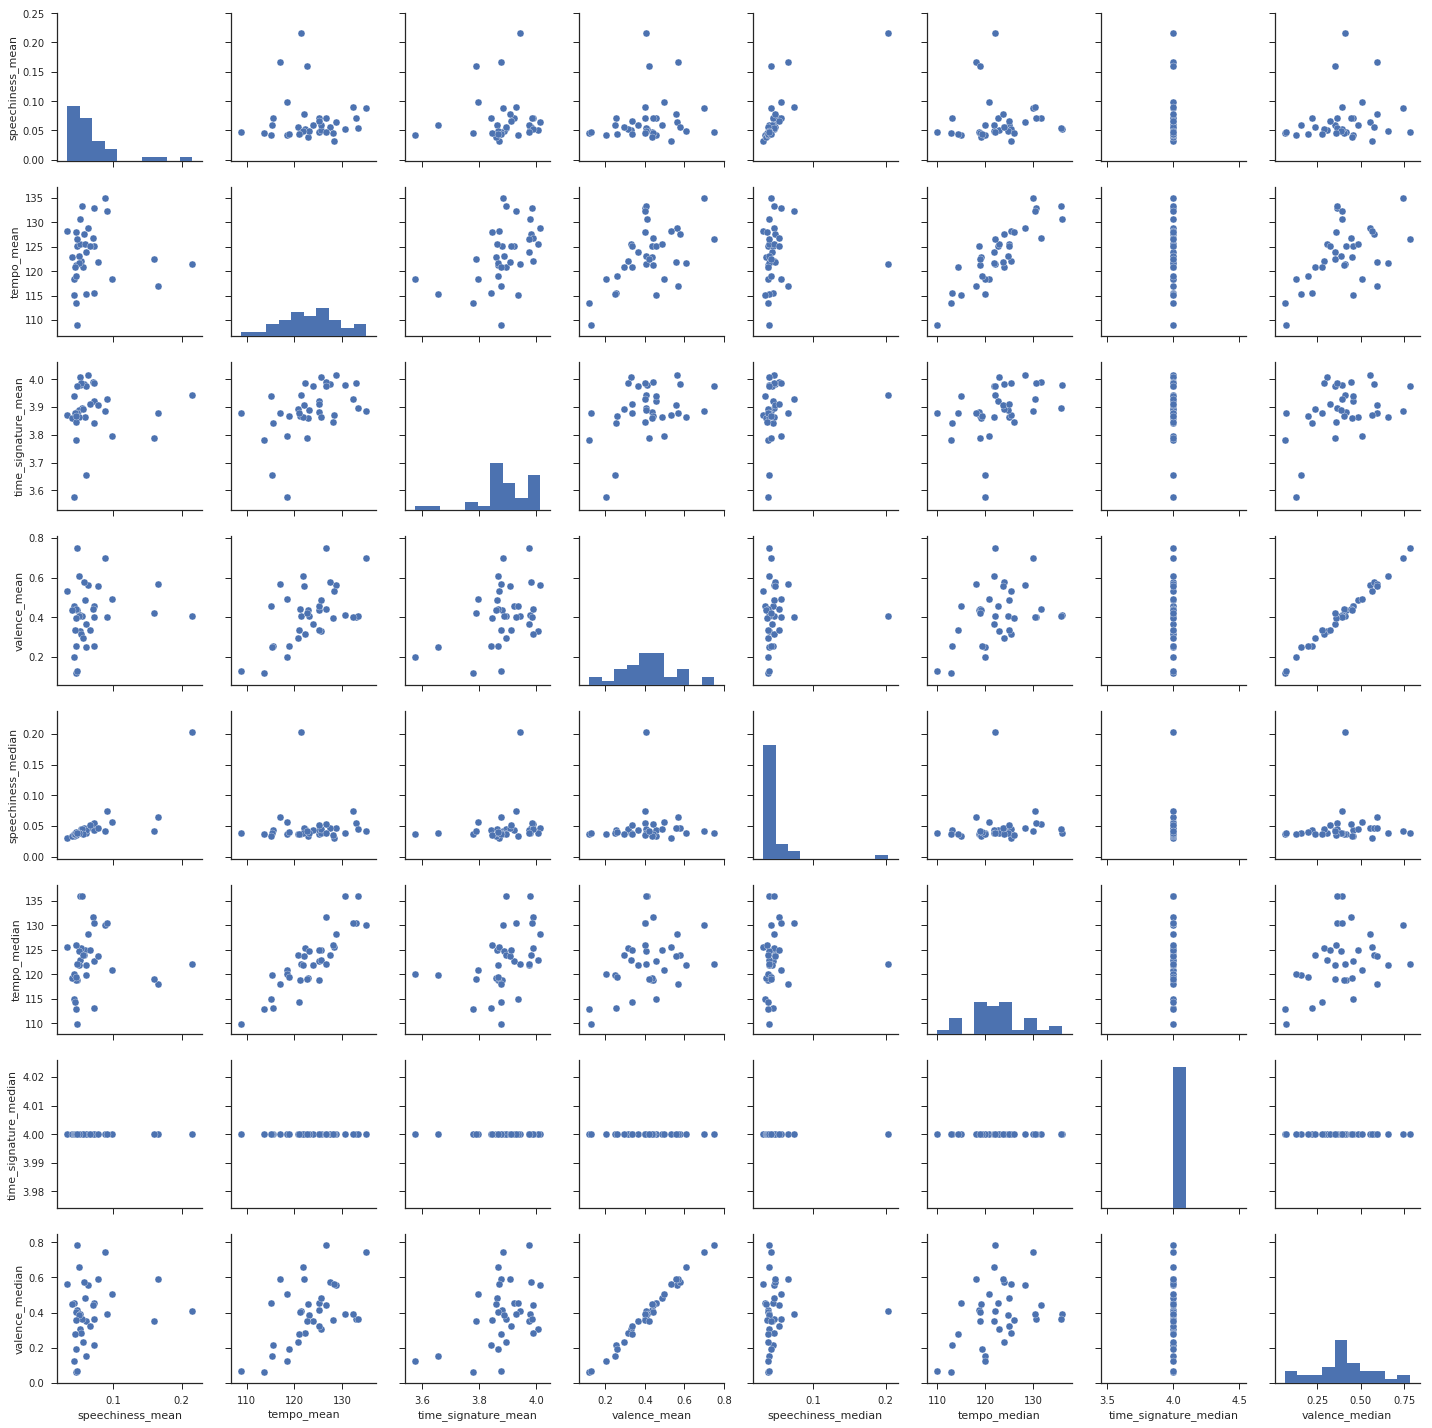

In [22]:
import seaborn as sns
columns = ['speechiness_mean','tempo_mean', 'time_signature_mean', 'valence_mean',
            'speechiness_median', 'tempo_median', 'time_signature_median', 'valence_median'
          ]
data = artists_features[columns]
sns.pairplot(data)

- Energy_mean and Loudness_mean are quite correlated
- No clear correlations on medians
- mean and median highly correlated in: acousticness, danceability, energy, instrumentalness, loudness, valence (tempo)


## PCA to reduce dimensionality and print a scatter plot 

In [25]:
# prepare the features x

from sklearn.preprocessing import StandardScaler

# construct a list with audio features column names
audio_features = artists_features.columns.drop(['artist_name'])

# separate the features of the rest of columns
x_pca = artists_features.loc[:, audio_features].values

# scale
x_pca = StandardScaler().fit_transform(x_pca)

Explained variance:  [0.30304056 0.14991325 0.11534579]


<BarContainer object of 3 artists>

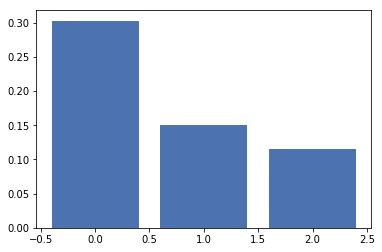

In [26]:
# Apply PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=3)

# get principal components 
principal_components = pca.fit_transform(x_pca)

# print explained variance by each ratio
print('Explained variance: ', pca.explained_variance_ratio_)
plt.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

In [27]:
# convert to dataframe
pca_df = pd.DataFrame(principal_components, columns = ['pc1', 'pc2', 'pc3'])

# merge principal components into main artists_features dataframe
artists_features = pd.concat([artists_features, pca_df], axis=1)

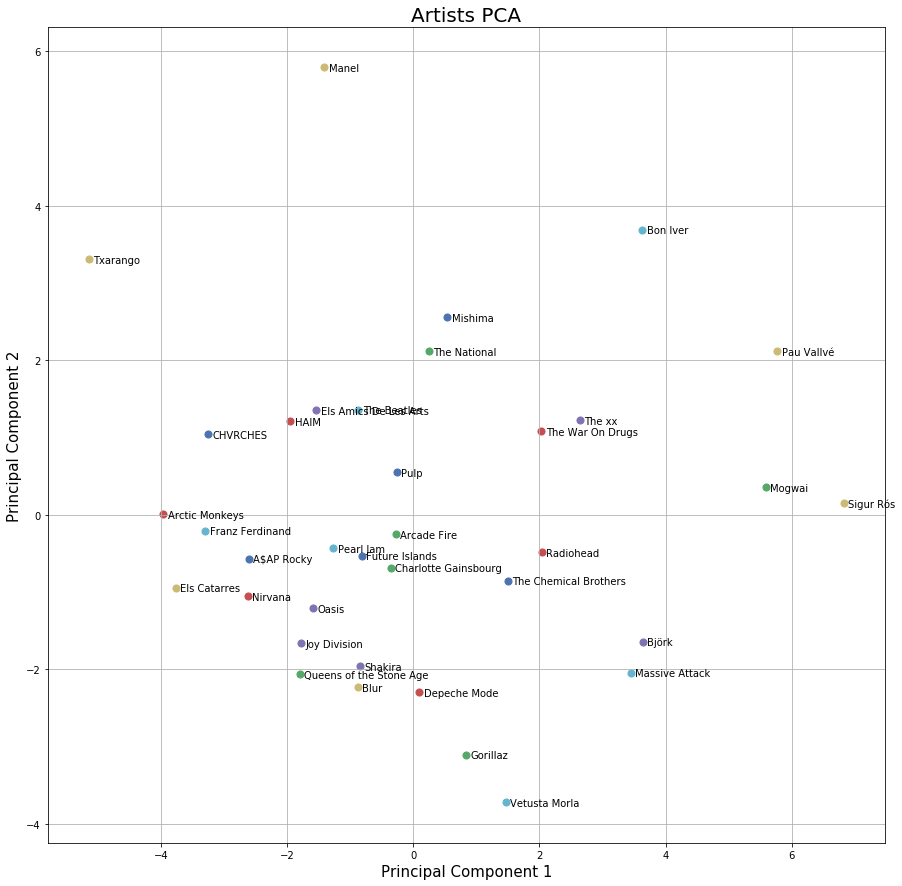

In [28]:
# scatter plot of the artists

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Artists PCA', fontsize = 20)

for a in artists_features['artist_name']:
    index = artists_features['artist_name'] == a
    ax.scatter(artists_features.loc[index, 'pc1'],
               artists_features.loc[index, 'pc2'],
               s = 50)

    ax.annotate(a, 
                (artists_features.loc[index, 'pc1'] + 0.07,
                 artists_features.loc[index, 'pc2'] - 0.05)
               )
    
#ax.legend(artists_features['artist_name'])
ax.grid()

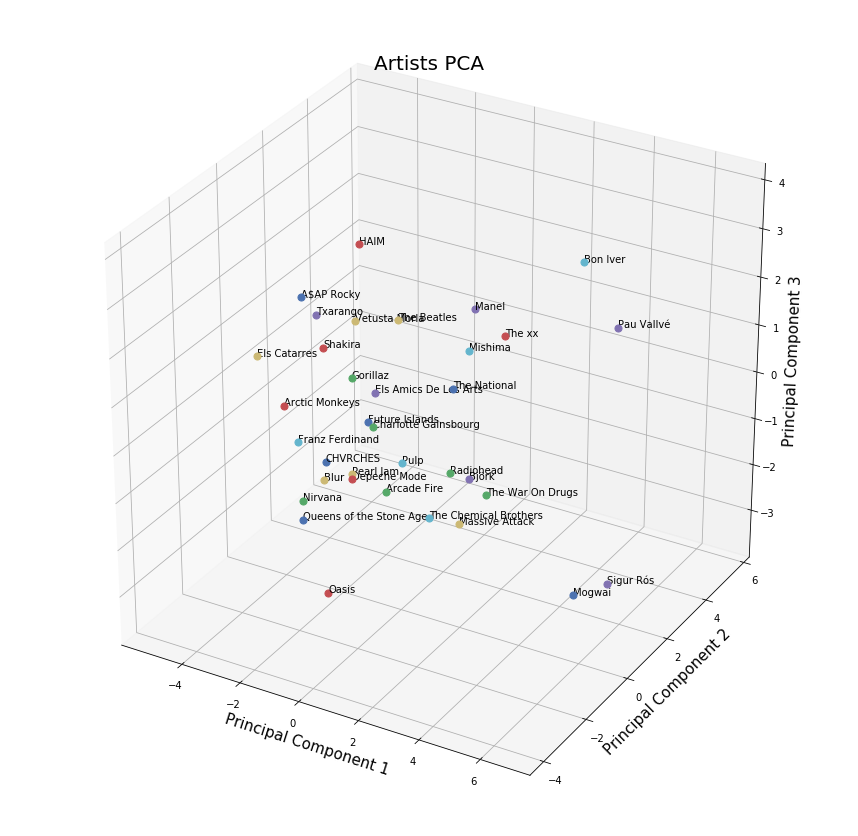

In [422]:
# 3D scatter plot of the artists

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('Artists PCA', fontsize = 20)

for a in artists_features['artist_name']:
    
    index = artists_features['artist_name'] == a

    ax.scatter(artists_features.loc[index, 'pc1'],
               artists_features.loc[index, 'pc2'],
               artists_features.loc[index, 'pc3'],
               zdir='z', 
               s=50
              )

    ax.text(artists_features.loc[index, 'pc1'].values[0],
            artists_features.loc[index, 'pc2'].values[0],
            artists_features.loc[index, 'pc3'].values[0],
            a,
            zdir=None
           )
    
#ax.legend(artists_features['artist_name'])
#ax.grid()